<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountryName       4012 non-null   object 
 1   Year              4012 non-null   int64  
 2   Sex               4012 non-null   object 
 3   DeathRatePer100K  4012 non-null   float64
 4   GNIPerCapita      4012 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 156.8+ KB
None


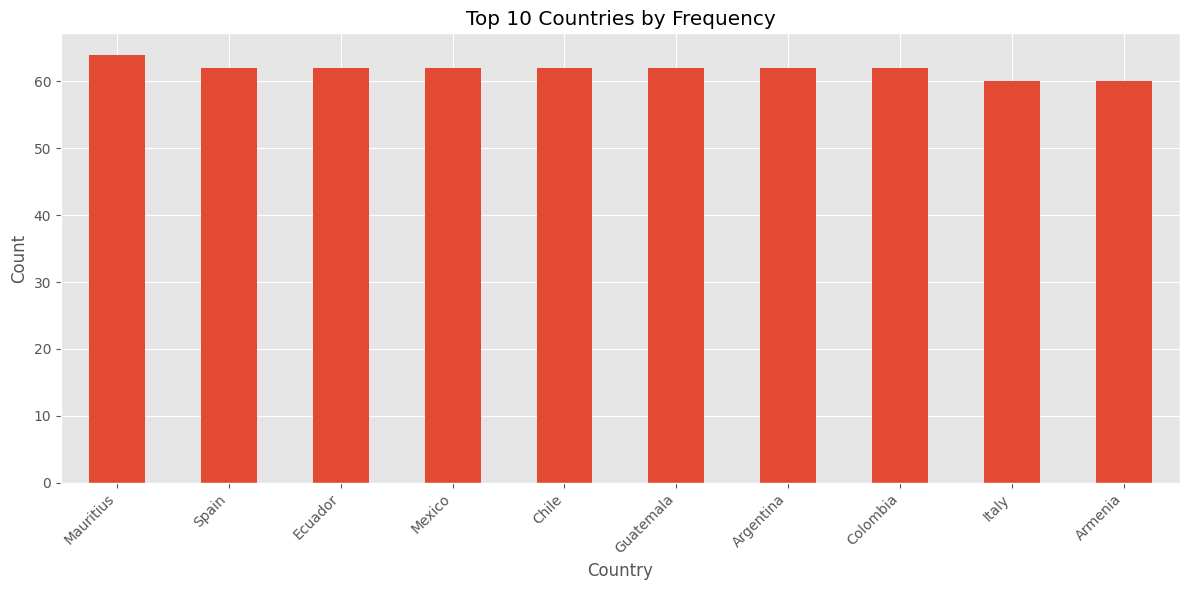

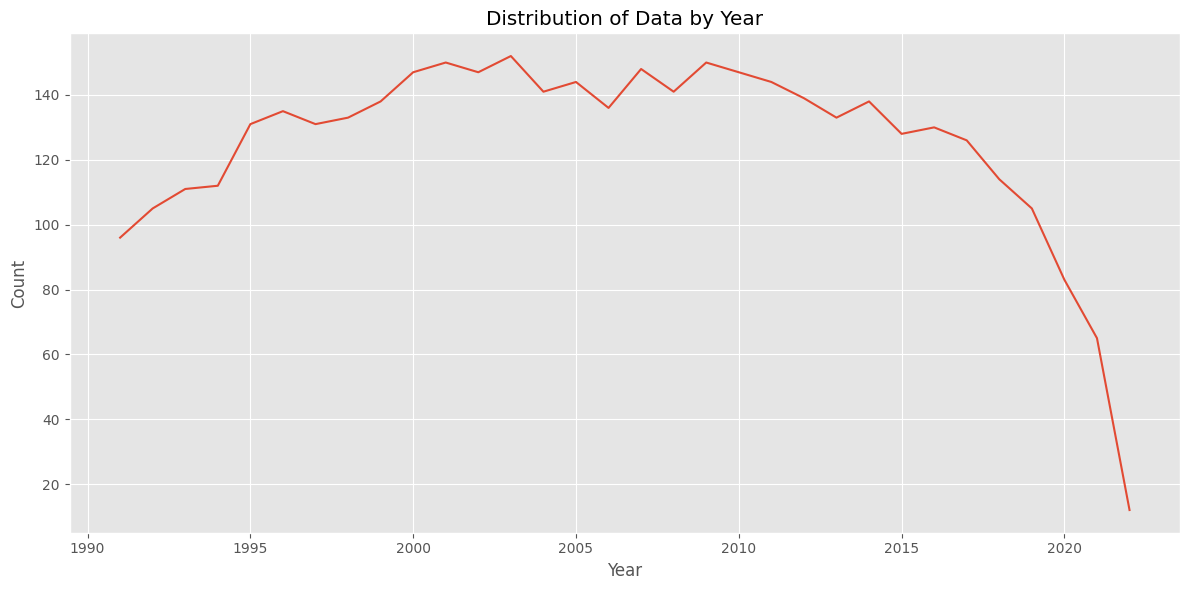

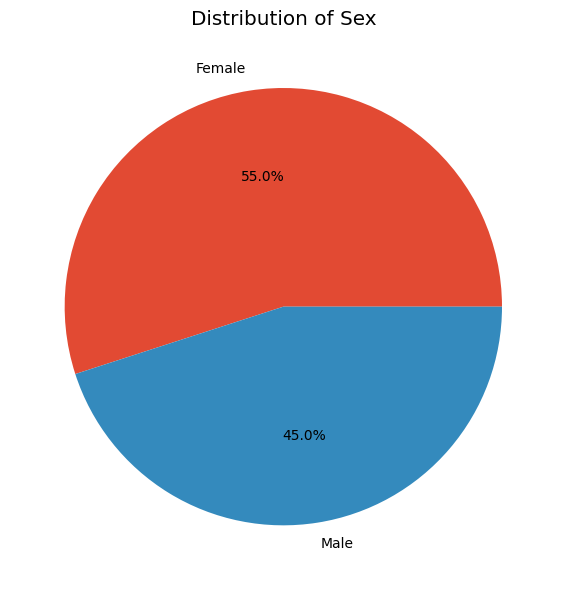

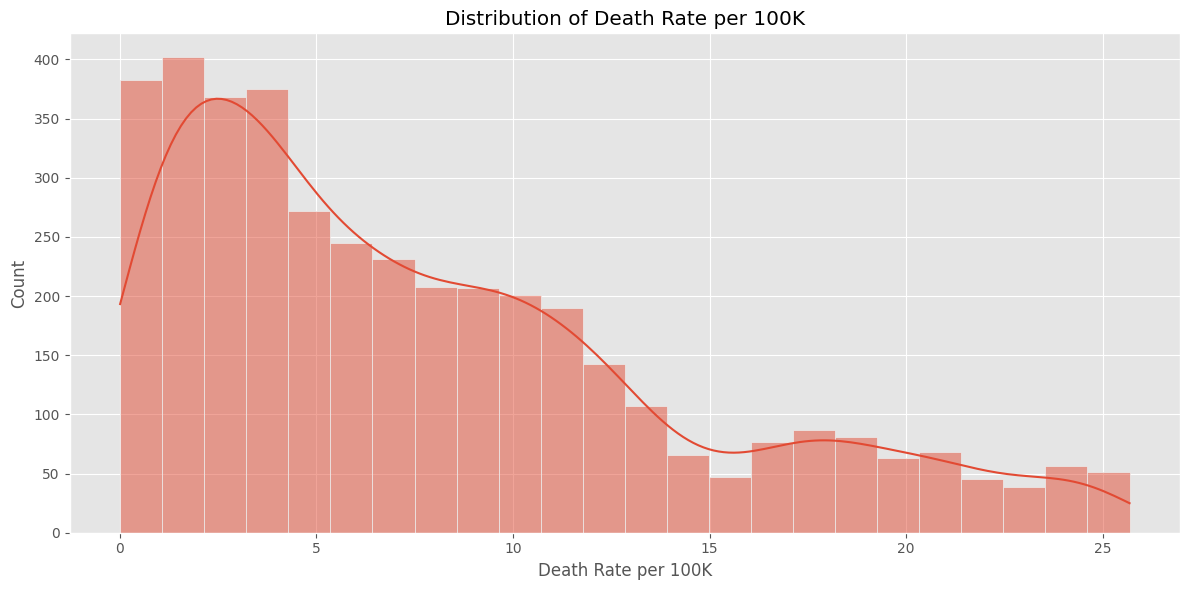

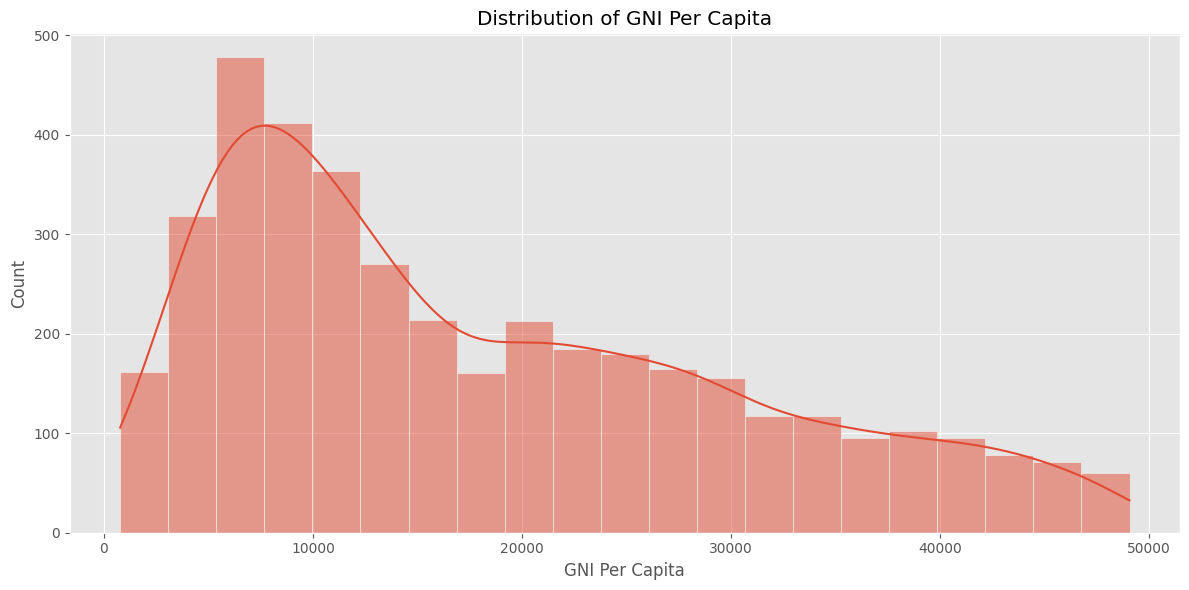

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('suiside.csv')

# Select columns to retain
columns_to_keep = ['CountryName', 'Year', 'Sex', 'DeathRatePer100K', 'GNIPerCapita']
df_cleaned = df[columns_to_keep]

# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove rows where DeathRatePer100K and GNIPerCapita are zero
df_cleaned = df_cleaned[(df_cleaned['DeathRatePer100K'] > 0) & (df_cleaned['GNIPerCapita'] > 0)]

# Remove outliers in DeathRatePer100K and GNIPerCapita (values exceeding the 90th percentile)
for col in ['DeathRatePer100K', 'GNIPerCapita']:
    threshold = df_cleaned[col].quantile(0.90)
    df_cleaned = df_cleaned[df_cleaned[col] <= threshold]

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# Print information about the processed dataset
print(df_cleaned.info())

# Visualize data distribution

plt.style.use('ggplot')

# 1. CountryName distribution (Top 10)
plt.figure(figsize=(12, 6))
df_cleaned['CountryName'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Countries by Frequency')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Year distribution
plt.figure(figsize=(12, 6))
df_cleaned['Year'].value_counts().sort_index().plot(kind='line')
plt.title('Distribution of Data by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Sex distribution
plt.figure(figsize=(8, 6))
df_cleaned['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. DeathRatePer100K distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['DeathRatePer100K'], kde=True)
plt.title('Distribution of Death Rate per 100K')
plt.xlabel('Death Rate per 100K')
plt.tight_layout()
plt.show()

# 5. GNIPerCapita distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['GNIPerCapita'], kde=True)
plt.title('Distribution of GNI Per Capita')
plt.xlabel('GNI Per Capita')
plt.tight_layout()
plt.show()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_data.csv', index=False)

In [5]:
total_countries = df_cleaned['CountryName'].nunique()
print(f"Total number of unique countries: {total_countries}")

# Find the year with the most data
year_with_most_data = df_cleaned['Year'].value_counts().idxmax()
count_of_most_data_year = df_cleaned['Year'].value_counts().max()
print(f"Year with the most data: {year_with_most_data}")
print(f"Number of records for {year_with_most_data}: {count_of_most_data_year}")


Total number of unique countries: 105
Year with the most data: 2003
Number of records for 2003: 152
